f(x)=log(x**2 + 1) - sin(x)
[0;0.7853981633974483]
Деление отрезка пополам: x*=0.5559857344461246, k=14, f(x*)=-0.2584255598605093
Золотое сечение: x*=0.5559601256410514, k=19, f(x*)=-0.2584255600142221


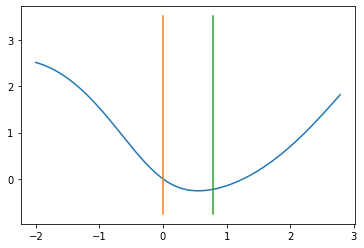

In [1]:
import sympy
import numpy as np
import matplotlib.pyplot as plt

def dichot(f, a, b, l): #Дихотомия. y,z - просто две точки, почти в центре, по ним смотрим куда двигаться. Мы ищем минимум в параболе
  k = 0 
  eps = l/2 #Погрешность
  while abs(b-a) > l: #Пока модуль двух точек больше единицы #Шаг 5
    y = (a+b-eps)/2 #Формула 1.
    z = (a+b+eps)/2 #формула 2.
    if f(y)<=f(z): b = z #если левая часть меньше правой, то сдвиг правой части влево
    else: a = y #в других случаях сдвиг левой части вправо 
    k+=1 #Кол-во проходов цикла. Кол-во итераций 
  return (a+b)/2, k, f((a+b)/2)

def golden(f, a, b, eps): #Золотое сечение
  k = 0
  phi = (3-np.sqrt(5))/2 #Статичное число
  while abs(b-a) > eps: #Пока модуль больше погрешности (Шаг 6)
    y = a + phi*(b-a) #Формула
    z = a + b - y #Формула
    if f(y)<=f(z): #Шаг 5 Левая граница не изменяется, правая двигается влево
      b = z #Права двигается влево
      y = a + b - y #Формула
      z = y 
    else: 
      a = y
      y = z
      z = a + b - z
    k+=1
  return (a+b)/2, k, f((a+b)/2)

def lab1():
  x = sympy.Symbol('x')
  f = sympy.ln(1+x**2)-sympy.sin(x)
  print('f(x)={}'.format(f))

  a,b = 0,np.pi/4
  print('[{};{}]'.format(a,b))

  eps = 1e-4
  x0 = 0

  foo = sympy.lambdify(x,f,'numpy')
  print("Деление отрезка пополам: x*={}, k={}, f(x*)={}".format(*dichot(foo,a,b,eps)))
  print("Золотое сечение: x*={}, k={}, f(x*)={}".format(*golden(foo,a,b,eps)))
  rng = np.linspace(a-2,b+2,200)
  plt.plot(rng,foo(rng))
  plt.plot([a,a],[foo(rng).min()-0.5,foo(rng).max()+1])
  plt.plot([b,b],[foo(rng).min()-0.5,foo(rng).max()+1])
  plt.show()

lab1()

f(x)=log(x**2 + 1) - sin(x)
[0;0.7853981633974483]
Метод Ньютона-Рафсона: x*=0.5559568992939028, k=2, f(x*)=-0.258425559971532
Метод средней точки: x*=0.5559242249096805, k=13, f(x*)=-0.25842555875671624


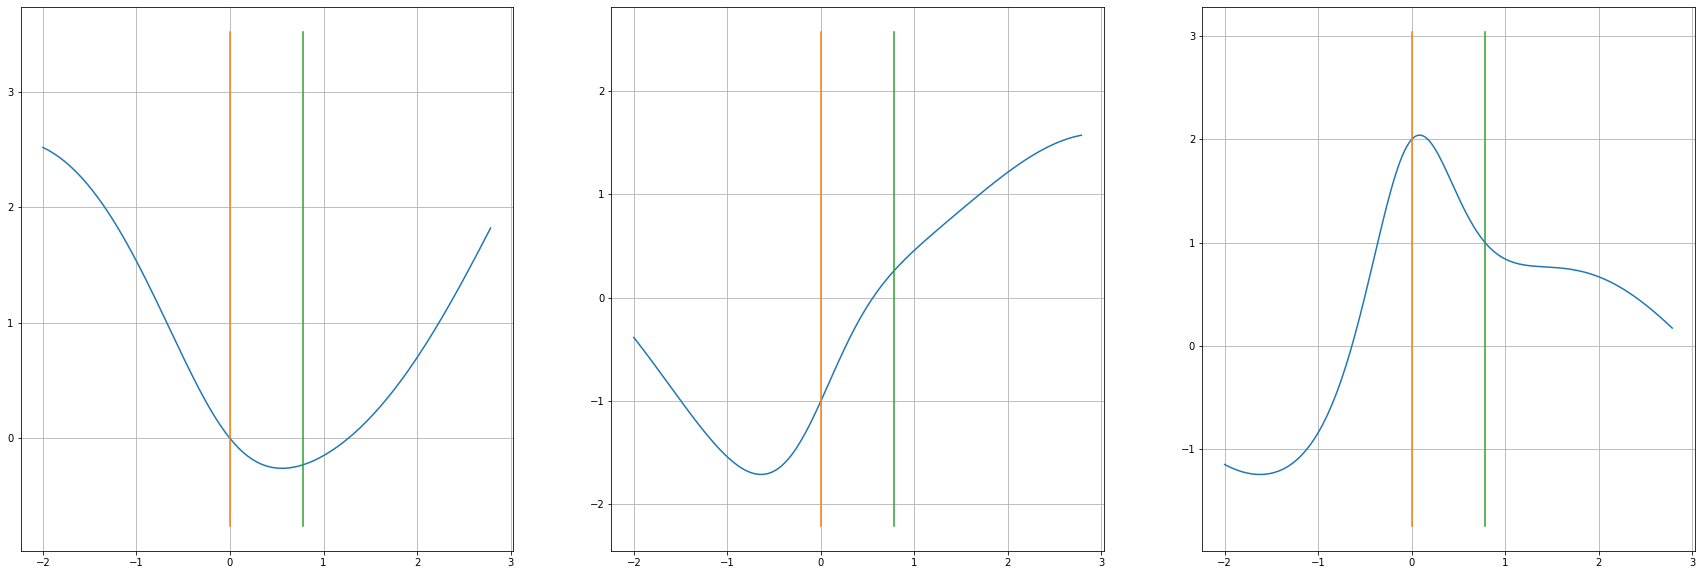

In [2]:
import sympy
import numpy as np
import matplotlib.pyplot as plt

def Newton(f, a, b, eps):
  x = sympy.Symbol('x')
  df = sympy.lambdify(x,f.diff(x),'numpy')
  d2f = sympy.lambdify(x,f.diff(x,2),'numpy')
  f = sympy.lambdify(x,f,'numpy')
  k = 0
  x = a+(b-a)*np.random.rand() #Начальная точка рандома
  while abs(df(x)) > eps: #Модуль производной в точке x больше погрешности
    x0 = x #Сохраняем и переписываем значение нулевой точки
    x = x0-df(x0)/d2f(x0) #Формула
    k+=1
  return x, k, f(x)

def Middle(f, a, b, eps):
  x = sympy.Symbol('x')
  df = sympy.lambdify(x,f.diff(x),'numpy')
  f = sympy.lambdify(x,f,'numpy')
  k = 0
  while True: #Делает бесконечно
    z = (a+b)/2 #формула
    dz = df(z) #Считываем и сохраняем значение dz
    if dz<0: #Сближаемся к точке
      a = z #Левая часть уменьшается
    else:
      b = z #Правая часть уменьшается
    k += 1 #Кол-во иттераций
    if abs(dz) <= eps: #Модуль производной в точке меньше/равен погрешности 
      break
  return (a+b)/2, k, f((a+b)/2)


def lab2():
  x = sympy.Symbol('x')
  f = sympy.ln(1+x**2)-sympy.sin(x)
  print('f(x)={}'.format(f))

  a,b = 0,np.pi/4 #Левая и правая граница промежутка
  print('[{};{}]'.format(a,b))

  eps = 1e-4 #Погрешность
  x0 = 0 #Значение нулевой точки

  foo = sympy.lambdify(x,f,'numpy')
  df = sympy.lambdify(x,f.diff(x),'numpy')
  d2f = sympy.lambdify(x,f.diff(x,2),'numpy')
  print("Метод Ньютона-Рафсона: x*={}, k={}, f(x*)={}".format(*Newton(f,a,b,eps)))
  print("Метод средней точки: x*={}, k={}, f(x*)={}".format(*Middle(f,a,b,eps)))
  rng = np.linspace(a-2,b+2,200)
  fig,ax = plt.subplots(1,3,figsize=(3*10,10))
  ax[0].plot(rng,foo(rng))
  ax[1].plot(rng,df(rng))
  ax[2].plot(rng,d2f(rng))
  for axis, f in zip(ax,[foo,df,d2f]):
    axis.plot([a,a],[f(rng).min()-0.5,f(rng).max()+1])
    axis.plot([b,b],[f(rng).min()-0.5,f(rng).max()+1])
    axis.grid(True, which='both')
  plt.show()

lab2()

In [3]:
import plotly.express as px
import plotly.graph_objects as go
import sympy
import numpy as np
#Симплекс в моем случае - треугольник.  Ищем минимум
def Simplex(f, x, eps):
  k = 1 
  gamma = np.random.rand() #коэффициент сжатия. От 0 до 1
  n = len(x) #Размер измерения (двумерная)
  L = n+1 #Размер симплекса
  p = (L/(n*np.sqrt(2)))*(np.sqrt(n+1)+n-1) 
  q = (L/(n*np.sqrt(2)))*(np.sqrt(n+1)-1)
  _x_ = np.zeros((L,n),dtype = x.dtype) #Нули размера n*l Массив из нулей, с соответствующим типом входных данных (тип подбирается сам, можно написать дробные числа np.float64)
  _x_[1:,:] = q #все, кроме первой строчки становится q по картинке
  for i in range(n): #по диагонали становится p
    _x_[i+1,i] = p
  simpl = np.zeros((L,n),dtype=np.float64) #Построение самого симплекса
  simpl[0] = x #Исходная вершина, шаг 1
  simpl = simpl[0] + _x_ #производится по формуле 2.1
  res = [0]*L #Массив, в который сохраняется значения функции, для второго шага. 
  while True: #Шаг второй. Считает значение функции. ЦФ - целевая функция
    for i in range(L): #Для каждой точки симплекса
      res[i] = f(*simpl[i]) #Сам подсчет целевой функции 
    for i in range(n): #Шаг 3. Если точки достаточно близки друг к другу (Значение функций в этих точках и точки симплекса)
      if abs(res[i+1]-res[i])<=eps and np.sqrt(((simpl[i+1]-simpl[i])**2).sum())<=eps: #Если значения функции в этих точках достаточно близки друг к другу. 
        return (simpl[i]+simpl[i+1])/2, k, (res[i+1]+res[i])/2 #Маленький симплекс, пришли к минимуму
    maxarg = np.argmax(res) #Шаг 4. Наихудшая вершина - значение максимальное. Номер вершины в симплексе.
    ref = (simpl.sum(axis=0) - simpl[maxarg])*2/n - simpl[maxarg] #Шаг 5. Отражение. Сложили все вершины симплекса (3 вершины) и отняли худшую. Отражаем самую худшую
    if f(*ref) > res[maxarg]: #Отраженная точка больше или меньше исходной худшей точки Шаг 6. Если больше, то забываем и делаем сжатие относительно лучшей точки
      minarg = np.argmin(res)
      simpl = simpl[minarg] * gamma + (1-gamma) * simpl
    else: #Если меньше, то мы ее записываем на место худшей точки
      simpl[maxarg] = ref
    k += 1
  return simpl, k, res

def Hooke(f, x, eps):
  k = 1
  alpha = 1+np.random.rand()*10 #Коэффициент почти сжатия
  n = len(x) #Размер измерения (двумерный)
  delta = x.copy() #Костыль. Копия размера x. Размер массив размера как x, но со значением 10. Шаг 1 начало
  delta[:] = 10 #Чтоб определить шаги
  best = x.copy() #Костыль. Копия. Шаг 1 конец
  foundbetter = False  
  while True:
    foundbetter = False #Исследующий поиск.
    for i in range(n): #В каждом направлении сделать шаг и посмотреть, в сторону увеличения или уменьшения
      newbest = best.copy() 
      newbest[i] += delta[i] #Прибавляем по одной координате
      if f(*best) > f(*newbest): #Получилось лучше или хуже, если лучше - запоминаем, хуже - пропускаем тот путь. 
        best = newbest
        foundbetter = True
        continue
      newbest = best.copy()
      newbest[i] -= delta[i] #Убавляем по одной координате
      if f(*best) > f(*newbest): #Получилось лучше или хуже, если лучше - запоминаем, хуже - пропускаем тот путь. 
        best = newbest
        foundbetter = True
    if not(foundbetter): #Если не удачный, то мы проверяем, если шаг по оси достаточно маленькие, значит мы в минимуме, если шаги большие, то уменьшаем и повторяем. Шаг 3
      if any(delta < eps): #Шаг 4. Немного не так написан, но суть та же. Разная суть доноса из методички.  
        return best, k, f(*best)
      else:
        delta /= alpha
    k += 1
    while True:
      newbest = best + (best - x) #Шаг 5. Ведет нас к лучшей точке. Шаг 6 = шаг 2.
      if f(*newbest)<f(*best): #Если она меньше, значит мы ее запоминаем, ибо она лучшая. Иначе - мы ищем новое направление. Шаг 7
        best = newbest
      else:
        break
  return best, k, f(*best)


def lab3():
  x1 = sympy.Symbol('x1')
  x2 = sympy.Symbol('x2')
  f = x1**3+x2**3-15*x1*x2
  print('f(x1,x2)={}'.format(f))

  _x = [0,0]
  _x0 = [5.23,4.41]
  print('x={}\nx0={}'.format(_x,_x0))

  eps = 1e-4

  foo = sympy.lambdify([x1,x2],f,'numpy')
  print("Симплексный метод: x*={}, k={}, f(x*)={}".format(*Simplex(foo, np.array(_x0,dtype=np.float64), eps)))
  print("Метод Хука-Дживса: x*={}, k={}, f(x*)={}".format(*Hooke(foo, np.array(_x0,dtype=np.float64), eps)))
  x = np.linspace(-1,10,20)
  y = np.linspace(-1,10,20)
  X, Y = np.meshgrid(x, y)
  Z = foo(X, Y)
  fig = go.Figure(data=[go.Surface(x=X,y=Y,z=Z)])
  fig.add_trace(go.Scatter3d(x=[_x[0]],y=[_x[1]],z=[foo(*_x)]))
  fig.add_trace(go.Scatter3d(x=[_x0[0]],y=[_x0[1]],z=[foo(*_x0)]))
  fig.show()

lab3()

ModuleNotFoundError: No module named 'plotly'

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import sympy
import numpy as np

def Cauchy(f, x, eps, df):
    k = 0
    startla = 0.02 #Лямбда шаг 1
    la = startla #Сбрасывать 
    while True:
        d = np.array([dif(*x) for dif in df]) # grad. Метод градиентный, по производным. Шаг 2. В какую сторону смотреть, чтоб прийти к минимуму, но не сказал как далеко. 
        temp = x - la * d #Временная переменная
        while True:  #Строим границы, они нам неизвестны
            oldla = la
            old = temp
            la *= 1.5 #Увеличиваем в полтора раза изначальное значение. 
            temp = x - la * d #Считаем точку, отступили
            if f(*temp) > f(*old): #Если значение меньше, то нам так и надо, но нам нужна вторая граница, если больше, то 
                a, b = oldla, la # dichot Просто вставить из первой лабы. Среднее значение
                while abs(b - a) > eps * 2:
                    y = (a + b - eps) / 2
                    z = (a + b + eps) / 2
                    if f(*(x - y * d)) <= f(*(x - z * d)):
                        b = z
                    else:
                        a = y
                temp = x - ((a + b) / 2) * d #Итоговый результат
                break
        print(temp)
        if np.sqrt((d ** 2).sum()) < eps and np.sqrt(((f(*temp) - f(*x)) ** 2).sum()): #Шаг 3. Если значение градиента (вектор) меньше погрешности и точки последовательных приближений близки друг к другу
            x = temp
            break
        x = temp
        la = startla #Чтоб выйти на следующую иттерацию цикла
        k += 1
    return x, k, f(*x)


def lab4():
    x1 = sympy.Symbol('x1')
    x2 = sympy.Symbol('x2')
    f = x1 ** 3 + x2 ** 3 - 15 * x1 * x2
    print('f(x1,x2)={}'.format(f))

    _x = [0, 0]
    _x0 = [5.23, 4.41]
    print('x={}\nx0={}'.format(_x, _x0))

    eps = 1e-4
    foo = sympy.lambdify([x1, x2], f, 'numpy')
    print("Метод Коши: x*={}, k={}, f(x*)={}".format(
        *Cauchy(foo, np.array(_x0,dtype=np.float64), eps, [sympy.lambdify([x1, x2], f.diff(arg), 'numpy') for arg in [x1, x2]])))
    _x0 = [6,7]
    print('x0={}'.format(_x0))
    print("Метод Коши: x*={}, k={}, f(x*)={}".format(
        *Cauchy(foo, np.array(_x0,dtype=np.float64), eps, [sympy.lambdify([x1, x2], f.diff(arg), 'numpy') for arg in [x1, x2]])))
    x = np.linspace(-1, 10, 55)
    y = np.linspace(-1, 10, 55)
    X, Y = np.meshgrid(x, y)
    Z = foo(X, Y)
    fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z)])
    fig.add_trace(go.Scatter3d(x=[_x[0]], y=[_x[1]], z=[foo(*_x)]))
    fig.add_trace(go.Scatter3d(x=[_x0[0]], y=[_x0[1]], z=[foo(*_x0)]))
    fig.show()


lab4()

f(x1,x2)=x1**3 - 15*x1*x2 + x2**3
x=[0, 0]
x0=[5.23, 4.41]
[4.86365868 4.87298872]
[5.0075631  4.98901653]
[4.9988435  4.99886603]
[5.00003847 4.99999248]
[5.00000939 5.0000109 ]
[5.0000014  4.99999832]
[4.99999997 4.99999984]
Метод Коши: x*=[4.99999997 4.99999984], k=6, f(x*)=-124.99999999999969
x0=[6, 7]
[5.9097627  5.28549121]
[5.1429406  5.43098949]
[5.20656778 5.08980731]
[5.05596679 5.10130678]
[5.04996596 5.0220124 ]
[5.01369441 5.02471558]
[5.01223469 5.00540587]
[5.00335327 5.00606505]
[5.00300662 5.00133484]
[5.00082551 5.0014917 ]
[5.0007395  5.00032757]
[5.00020285 5.00036688]
[5.00018191 5.00008051]
[5.00004988 5.00009024]
[5.00004475 5.0000198 ]
[5.00001227 5.0000222 ]
[5.00001101 5.00000495]
[5.000003   5.00000547]
[5.00000271 5.0000011 ]
[5.00000073 5.00000133]
Метод Коши: x*=[5.00000073 5.00000133], k=19, f(x*)=-124.99999999997998
